<a href="https://colab.research.google.com/github/pritiyadav888/AI-projects/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()  # select the kaggle.json file that you downloaded


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pritiyadavml","key":"c7d9aa4ad23f14b442312e8ae42af5bf"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


 79% 52.0M/66.0M [00:00<00:00, 142MB/s] 
100% 66.0M/66.0M [00:00<00:00, 120MB/s]


In [4]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
# import pandas as pd

# data = pd.read_csv('creditcard.csv')

In [ ]:
# print(data.shape)
# print(data.info())
# print(data['Class'].value_counts())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [ ]:
# print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

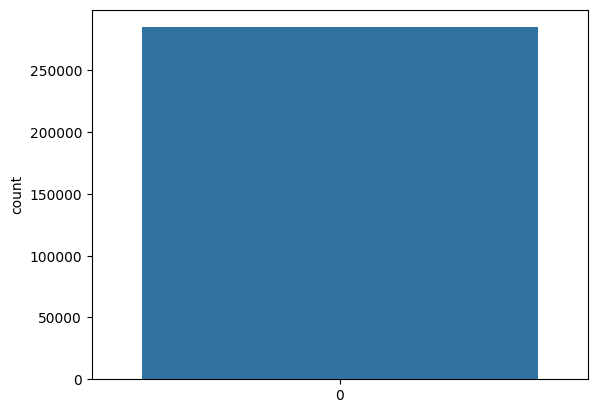

In [ ]:
# print(data.describe())
# print(data.isnull().sum())
# sns.countplot(data['Class'])
# plt.show()

In [5]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=28ea4f27adf62225988c154cf6ffde6fada372497e71d460c0e72e756ca3d140
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [6]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [7]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import (MinMaxScaler, MaxAbsScaler, StandardScaler, PowerTransformer,
                                   QuantileTransformer, Normalizer, FunctionTransformer, PolynomialFeatures, RobustScaler)
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from tpot import TPOTClassifier
import joblib
import inspect

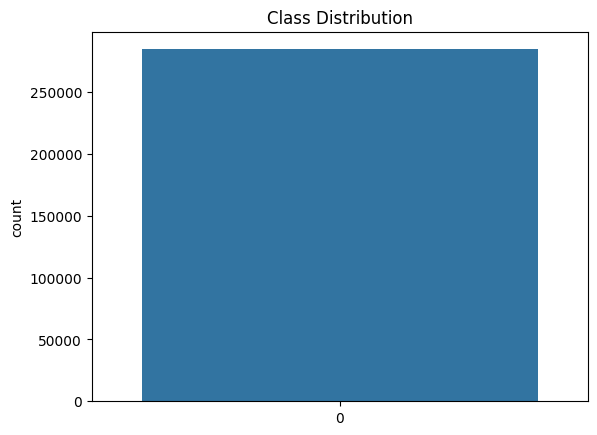

In [8]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Data Visualization
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

In [9]:
# List of preprocessing options and ML algorithms
preprocessors = [MinMaxScaler, MaxAbsScaler, StandardScaler, PowerTransformer,
                 QuantileTransformer, Normalizer, FunctionTransformer, PolynomialFeatures, RobustScaler]

# Define your classifiers
ml_algorithms = [
    RandomForestClassifier,  # Notice we're not creating an instance here
    AdaBoostClassifier,
    KNeighborsClassifier,
    DecisionTreeClassifier,
    LogisticRegression,
    SVC,
    CatBoostClassifier,
    xgb.XGBClassifier
    # lgb.LGBMClassifier,
    # TPOTClassifier
]


# Placeholder for storing results
results = []

In [10]:
# Define specificity and IBA functions according to the new definitions
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

def iba(y_true, y_pred, alpha=0.1):
    recall = recall_score(y_true, y_pred)
    spec = specificity(y_true, y_pred)
    ba = balanced_accuracy_score(y_true, y_pred)
    iba = (1 + alpha * (recall - spec)**2) * ba
    return iba

iba_scorer = make_scorer(iba)

# Placeholder for storing the best classifier and score
best_score = float('-inf')
best_clf = None
# Instantiate preprocessors and ML algorithms outside loops
# Instantiate preprocessors and ML algorithms outside loops
# Instantiate preprocessors and ML algorithms outside loops
preprocessor_instances = [preprocessor() for preprocessor in preprocessors]

ml_algorithm_instances = []
for ml_algorithm in ml_algorithms:
    params = {'random_state': 42} if 'random_state' in inspect.signature(ml_algorithm.__init__).parameters else {}

    if ml_algorithm == RandomForestClassifier:
        params['n_estimators'] = 50

    # if ml_algorithm == TPOTClassifier:
    #     params.update({
    #         'max_time_mins': 45,
    #         'scoring': 'balanced_accuracy',
    #         'n_jobs': -1,
    #         'generations': 5,
    #         'population_size': 20
    #     })

    ml_algorithm_instances.append(ml_algorithm(**params))

results = []


def gmean(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    spec = specificity(y_true, y_pred)
    return (recall * spec)**0.5

def balanced_metric(y_true, y_pred, dominance=0.1):
    recall = recall_score(y_true, y_pred)
    g_mean = gmean(y_true, y_pred)
    return dominance * recall + (1 - dominance) * g_mean


In [ ]:
# for remove_duplicates in [True, False]:
#     for use_tomek_links in [True, False]:
#         for preprocessor in preprocessors:
#             for ml_algorithm in ml_algorithms:

#                 # Preprocessing
#                 temp_data = data.drop_duplicates() if remove_duplicates else data
#                 if use_tomek_links:
#                     tl = TomekLinks()
#                     X_resampled, y_resampled = tl.fit_resample(temp_data.drop('Class', axis=1), temp_data['Class'])
#                 else:
#                     X_resampled, y_resampled = temp_data.drop('Class', axis=1), temp_data['Class']

#                 scaler = preprocessor()
#                 X_scaled = scaler.fit_transform(X_resampled)

#                 # Splitting the dataset
#                 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

#                 # Training and evaluation
#                 clf = ml_algorithm()
#                 clf.fit(X_train, y_train)
#                 y_pred = clf.predict(X_test)

#                 # Cross-validation and IBA calculation
#                 cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
#                 iba_score = iba(y_test, y_pred)

#                 # Storing results
#                 result = {
#                     'Remove Duplicates': remove_duplicates,
#                     'Use Tomek Links': use_tomek_links,
#                     'Preprocessor': preprocessor.__name__,
#                     'ML Algorithm': ml_algorithm.__name__,
#                     'Accuracy': accuracy_score(y_test, y_pred),
#                     'Precision': precision_score(y_test, y_pred),
#                     'Recall': recall_score(y_test, y_pred),
#                     'F1 Score': f1_score(y_test, y_pred),
#                     'CV Score': cv_scores.mean(),
#                     'IBA': iba_score
#                 }
#                 results.append(result)

In [11]:
start_process_time = time.time()  # Start overall process timer

for remove_duplicates in [True, False]:
    temp_data = data.drop_duplicates() if remove_duplicates else data
    for use_tomek_links in [True, False]:
        if use_tomek_links:
            tl = TomekLinks()
            X_resampled, y_resampled = tl.fit_resample(temp_data.drop('Class', axis=1), temp_data['Class'])
        else:
            X_resampled, y_resampled = temp_data.drop('Class', axis=1), temp_data['Class']

        for scaler in preprocessor_instances:
            X_scaled = scaler.fit_transform(X_resampled)
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

            for clf in ml_algorithm_instances:
                # Check if overall time is close to 55 minutes and break if so
                if time.time() - start_process_time > 55 * 60:
                    break

                start_time = time.time()  # Start the timer
                print(f"Training with {scaler.__class__.__name__} preprocessor, {clf.__class__.__name__} classifier, remove_duplicates: {remove_duplicates}, use_tomek_links: {use_tomek_links}...")
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time  # End the timer
                print(f"{clf.__class__.__name__} trained in {training_time:.2f} seconds")
                y_pred = clf.predict(X_test)

                # Additional evaluation metrics
                gmean_score = gmean(y_test, y_pred)
                balanced_score = balanced_metric(y_test, y_pred)
                iba_score = iba(y_test, y_pred)
                cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
                cv_scores = cross_val_score(clf, X_scaled, y_resampled, cv=cv, scoring='f1', n_jobs=-1)
                for fold, _ in enumerate(cv.split(X_scaled, y_resampled)):
                  print(f"Processing fold {fold + 1}...")

                result_dict = {
                    'Remove Duplicates': remove_duplicates,
                    'Use Tomek Links': use_tomek_links,
                    'Preprocessor': scaler.__class__.__name__,
                    'ML Algorithm': clf.__class__.__name__,
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred),
                    'Recall': recall_score(y_test, y_pred),
                    'F1 Score': f1_score(y_test, y_pred),
                    'Gmean': gmean_score,
                    'Balanced Metric': balanced_score,
                    'CV Score': cv_scores.mean(),
                    'IBA': iba_score
                }

                results.append(result_dict)

                # Checking if the model is the best based on balanced_metric
                if balanced_score > best_score:
                    best_score = balanced_score
                    best_clf = clf
                    print(f"New best score {best_score} found with {clf.__class__.__name__} classifier!")

                 # Break from innermost loop if overall time is close to 55 minutes
            if time.time() - start_process_time > 55 * 60:
                break

        # Break from second innermost loop if overall time is close to 55 minutes
        if time.time() - start_process_time > 55 * 60:
            break

    # Break from outermost loop if overall time is close to 55 minutes
    if time.time() - start_process_time > 55 * 60:
        break

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

Training with MinMaxScaler preprocessor, RandomForestClassifier classifier, remove_duplicates: True, use_tomek_links: True...
RandomForestClassifier trained in 107.52 seconds
Processing fold 1...
Processing fold 2...
Processing fold 3...
New best score 0.8951000124411793 found with RandomForestClassifier classifier!
Training with MinMaxScaler preprocessor, AdaBoostClassifier classifier, remove_duplicates: True, use_tomek_links: True...
AdaBoostClassifier trained in 65.71 seconds
Processing fold 1...
Processing fold 2...
Processing fold 3...
Training with MinMaxScaler preprocessor, KNeighborsClassifier classifier, remove_duplicates: True, use_tomek_links: True...
KNeighborsClassifier trained in 0.01 seconds
Processing fold 1...
Processing fold 2...
Processing fold 3...
Training with MinMaxScaler preprocessor, DecisionTreeClassifier classifier, remove_duplicates: True, use_tomek_links: True...
DecisionTreeClassifier trained in 20.20 seconds
Processing fold 1...
Processing fold 2...
Proce

In [12]:
# Saving the best classifier
joblib.dump(best_clf, 'best_model.pkl')

['best_model.pkl']

In [13]:
final_cv_scores = cross_val_score(best_clf, X_scaled, y_resampled, cv=10)

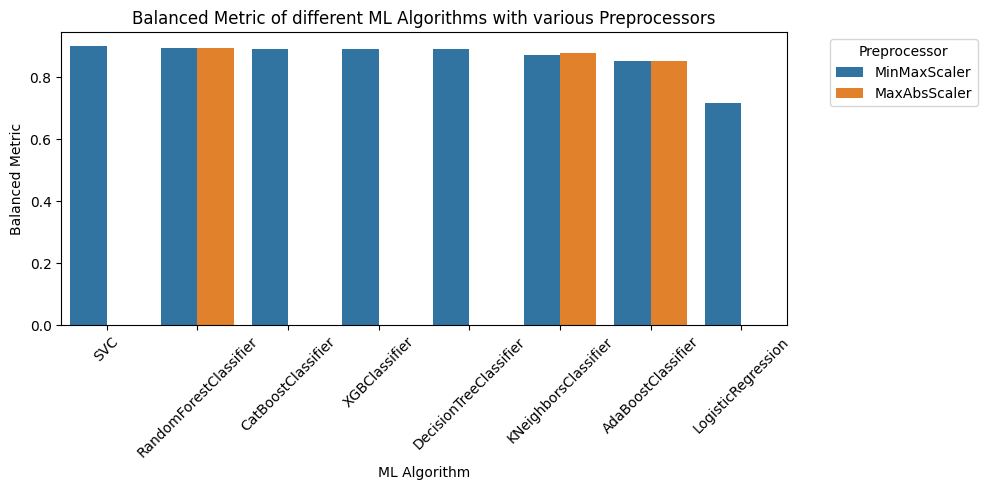

    Remove Duplicates  Use Tomek Links  Preprocessor            ML Algorithm  \
5                True             True  MinMaxScaler                     SVC   
0                True             True  MinMaxScaler  RandomForestClassifier   
8                True             True  MaxAbsScaler  RandomForestClassifier   
6                True             True  MinMaxScaler      CatBoostClassifier   
7                True             True  MinMaxScaler           XGBClassifier   
3                True             True  MinMaxScaler  DecisionTreeClassifier   
10               True             True  MaxAbsScaler    KNeighborsClassifier   
2                True             True  MinMaxScaler    KNeighborsClassifier   
1                True             True  MinMaxScaler      AdaBoostClassifier   
9                True             True  MaxAbsScaler      AdaBoostClassifier   
4                True             True  MinMaxScaler      LogisticRegression   

    Accuracy  Precision    Recall  F1 S

In [14]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Result Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.sort_values(by='Balanced Metric', ascending=False), x='ML Algorithm', y='Balanced Metric', hue='Preprocessor')
plt.title('Balanced Metric of different ML Algorithms with various Preprocessors')
plt.xticks(rotation=45)
plt.legend(title='Preprocessor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(results_df.sort_values(by='Balanced Metric', ascending=False))

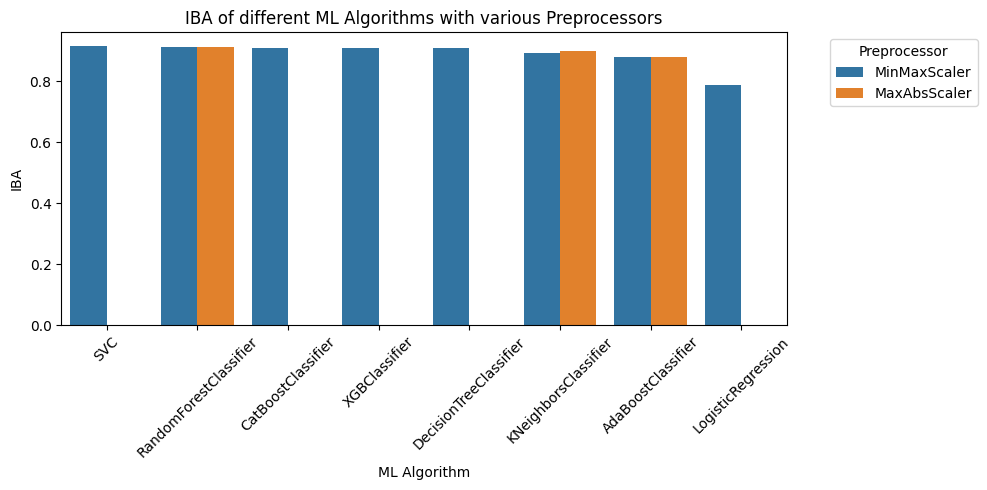

    Remove Duplicates  Use Tomek Links  Preprocessor            ML Algorithm  \
5                True             True  MinMaxScaler                     SVC   
0                True             True  MinMaxScaler  RandomForestClassifier   
8                True             True  MaxAbsScaler  RandomForestClassifier   
6                True             True  MinMaxScaler      CatBoostClassifier   
7                True             True  MinMaxScaler           XGBClassifier   
3                True             True  MinMaxScaler  DecisionTreeClassifier   
10               True             True  MaxAbsScaler    KNeighborsClassifier   
2                True             True  MinMaxScaler    KNeighborsClassifier   
1                True             True  MinMaxScaler      AdaBoostClassifier   
9                True             True  MaxAbsScaler      AdaBoostClassifier   
4                True             True  MinMaxScaler      LogisticRegression   

    Accuracy  Precision    Recall  F1 S

In [15]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Result Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.sort_values(by='IBA', ascending=False), x='ML Algorithm', y='IBA', hue='Preprocessor')
plt.title('IBA of different ML Algorithms with various Preprocessors')
plt.xticks(rotation=45)
plt.legend(title='Preprocessor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(results_df.sort_values(by='IBA', ascending=False))

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'iba': make_scorer(balanced_metric)
}

X = temp_data.drop('Class', axis=1)
y = temp_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, scoring_method in scoring.items():
    # Classifier training
    clf = ml_algorithm()
    clf.fit(X_train, y_train)

    # Evaluation
    y_pred = clf.predict(X_test)
    score = scoring_method(y_test, y_pred)

    # Storing the results
    results.append({
        'Classifier': ml_algorithm.__name__,
        'Preprocessor': preprocessor.__name__,
        'Remove Duplicates': remove_duplicates,
        'Use Tomek Links': use_tomek_links,
        'Score Type': name,
        'Score': score
    })

    if name == 'accuracy' and score > best_score:
        best_score = score
        best_clf = clf

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results similar to the images
plt.figure(figsize=(15, 10))

# Get the top classifiers for demonstration
top_classifiers = results_df['Classifier'].unique()[:5]  # Adjust this for the number of classifiers you want to display

for classifier in top_classifiers:
    subset = results_df[results_df['Classifier'] == classifier]
    plt.plot(subset['Score Type'], subset['Score'], label=classifier)

plt.legend()
plt.title('Classification Results')
plt.xlabel('Score Type')
plt.ylabel('Score Value')
plt.show()

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('best_model.pkl')  # Load your trained model

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Get the transaction data
    X = pd.DataFrame(data)  # Convert to DataFrame (assuming it's in the right format)
    y_pred = model.predict(X)  # Predict fraud
    return jsonify({'prediction': y_pred.tolist()})  # Return the prediction

if __name__ == '__main__':
    app.run()